## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [03] : [Principal Component Analysis] </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Rendy Wirawan Tamrin"
myNIM = "00000053580"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Start: 		2023-02-23 10:00:10.660019
Device ID: 	2f924f05-b326-11ed-b214-088fc3234331



---

### Dataset yang dipakai:

1. [Unsupervised Learning on Country Data] – sumber : [https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data]
2. [PCA Using Python: Image Compression] – sumber : [https://scicoding.com/pca-using-python-image-compression/]

### Hasil kerja

#### Principal Component Analysis

In [2]:
# Import libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
import pandas as pd

df = pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

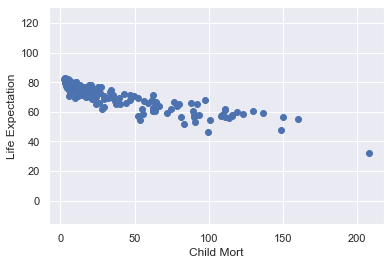

In [4]:
# Visualization
plt.scatter(df.iloc[:, 1], df.iloc[:, 7])
plt.xlabel("Child Mort")
plt.ylabel("Life Expectation")
plt.axis('equal');

In [5]:
X = df[['child_mort', 'life_expec']].dropna()

In [6]:
X.head()

child_mort  life_expec
0        90.2        56.2
1        16.6        76.3
2        27.3        76.5
3       119.0        60.1
4        10.3        76.8

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [8]:
print(pca.components_)

[[ 0.98104889 -0.19376035]
 [-0.19376035 -0.98104889]]


In [9]:
print(pca.explained_variance_)

[1689.23037986   16.28083938]


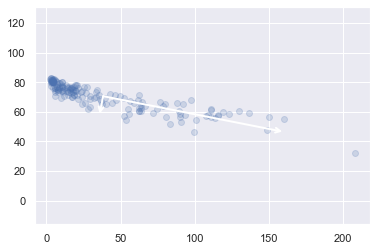

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# plot data
plt.scatter(X['child_mort'], X['life_expec'], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

#### PCA as dimensionality reduction

In [11]:
# Reducing transformed data to a single dimension

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)

original shape:  (167, 2)
transformed shape:  (167, 1)


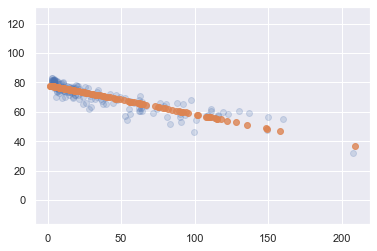

In [12]:
# The effect of the dimensionality reduction

X_new = pca.inverse_transform(X_pca)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

#### Choosing the number of component

In [13]:
# Import skimage Library
import skimage

path = './water.jpg'

image = skimage.io.imread(path) # Load image
image = skimage.color.rgb2gray(image) # Convert to grayscale

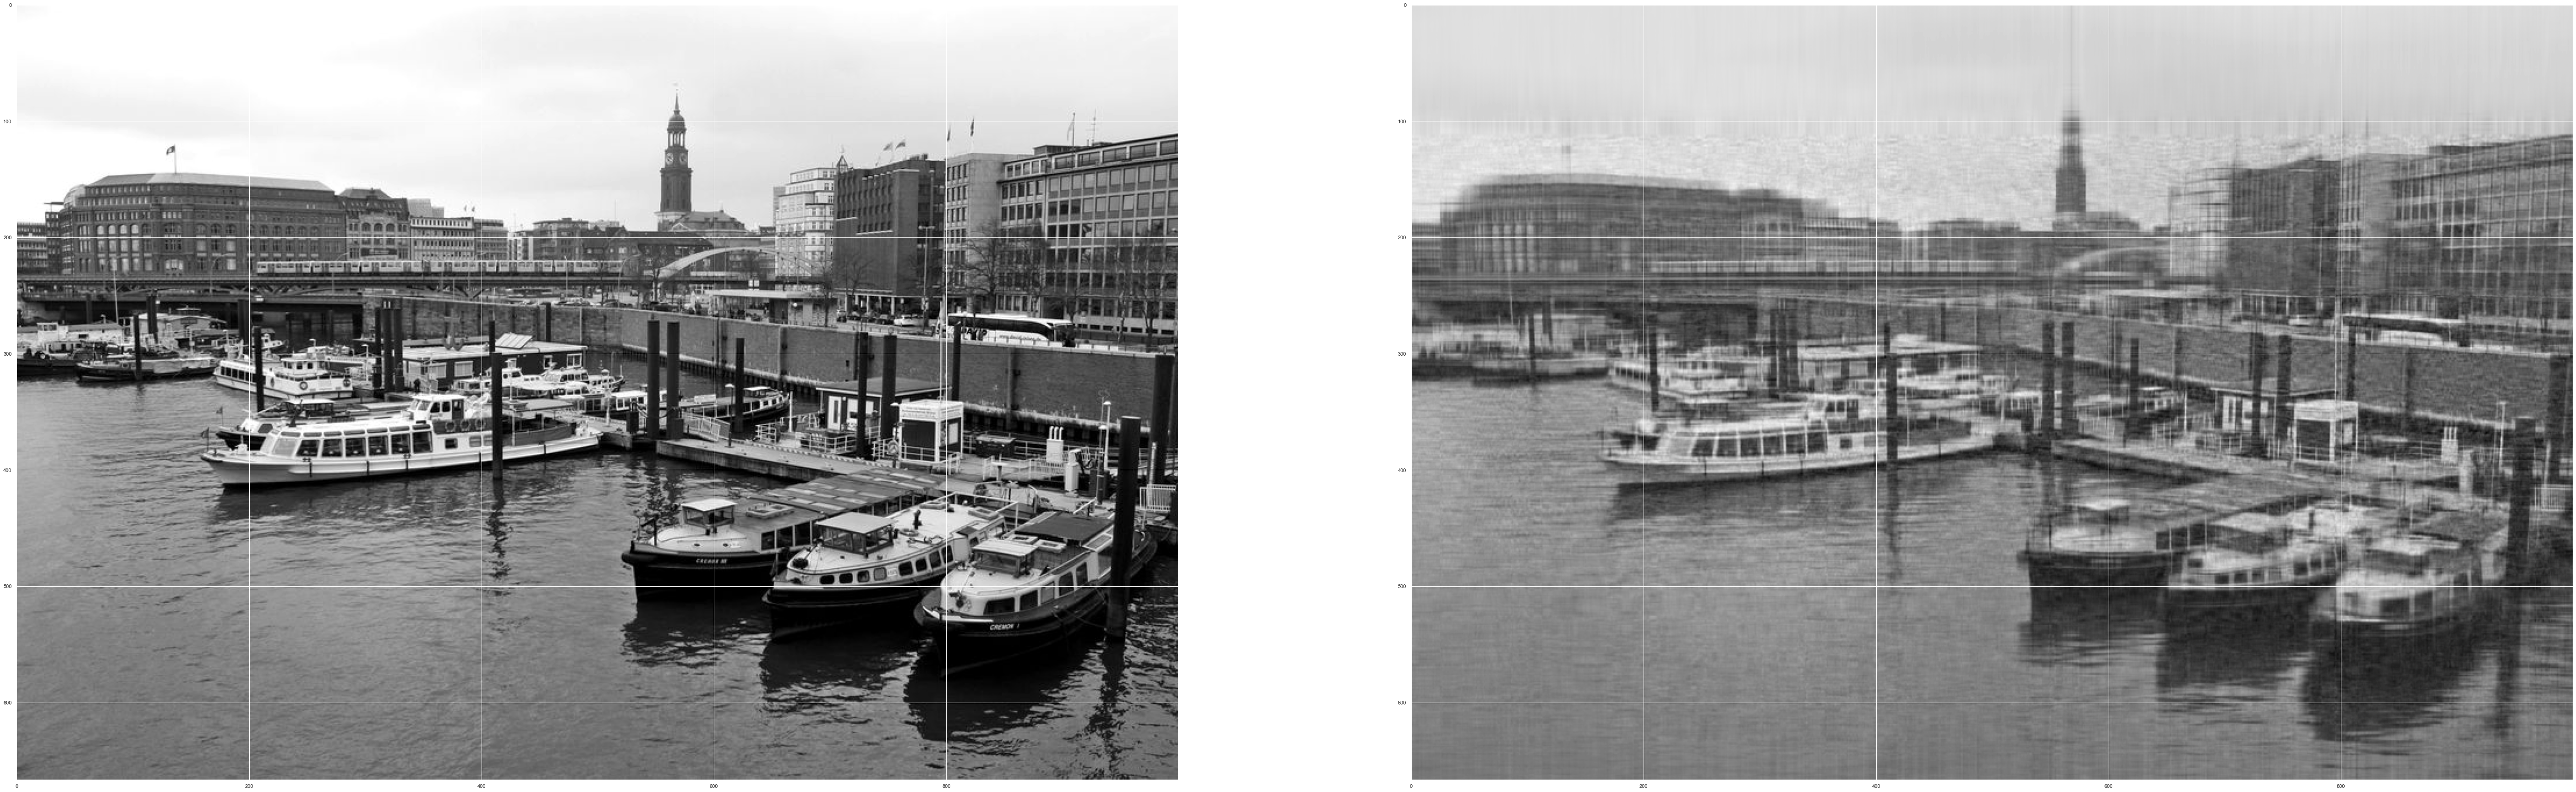

In [14]:
# compress the image using only 50 PCA vectors

pca = PCA(n_components=50)
image_compressed = pca.fit_transform(image)
image_decompressed = pca.inverse_transform(image_compressed)

fig, axes = plt.subplots(1,2, figsize=(100, 100))
axes[0].imshow(image, cmap='gray')
axes[0].set_label("Original image")
axes[1].imshow(image_decompressed, cmap='gray')
axes[1].set_label("Compressed image")

In [15]:
image.shape

(667, 1000)

#### Calculating the cumulative explained variance ratio

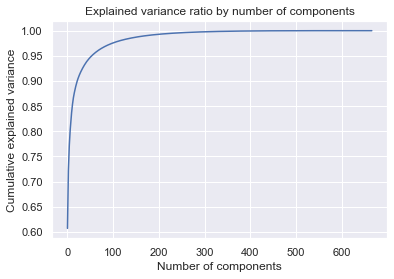

In [16]:
# Calculate 1000 first principal components
n_samples = 667
pca = PCA(n_components=min(1000, n_samples)).fit(image) 

# Collect the explained variance of each component
explained_variance = pca.explained_variance_ratio_ 

# Component indices
components = [i for i in range(0, len(explained_variance))] 

# Explained variance ratio
explained_variance_ratio = [i for i in explained_variance] 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Explained variance ratio by number of components')
ax.set_ylabel('Cumulative explained variance')
ax.set_xlabel('Number of components')

# Cumulative explained variance ratio:
ax.plot(components, np.cumsum(explained_variance_ratio)) 

#### PCA As Noise Filtering

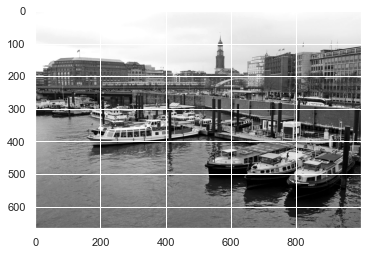

In [17]:
# Without Noise
plt.imshow(image, cmap='gray')

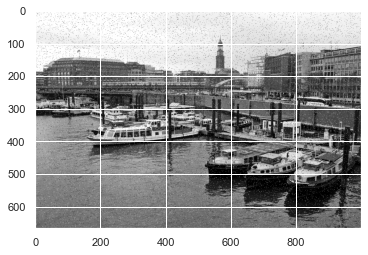

In [27]:
# Add some random noise and replot the figure

from PIL import Image
from imgaug import augmenters as iaa

def main():
    im = Image.open("water.jpg")
    im_arr = np.asarray(im)

    # gaussian noise
    # aug = iaa.AdditiveGaussianNoise(loc=0, scale=0.1*255)

    # poisson noise
    # aug = iaa.AdditivePoissonNoise(lam=10.0, per_channel=True)

    # salt and pepper noise
    aug = iaa.SaltAndPepper(p=0.05)

    im_arr = aug.augment_image(im_arr)

    im = Image.fromarray(im_arr).convert('RGB')
    plt.imshow(im)


if __name__ == "__main__":
    main()

In [46]:
np.random.seed(42)
noisy = np.random.normal(img, 10)
noisy.shape

(667, 1000, 3)

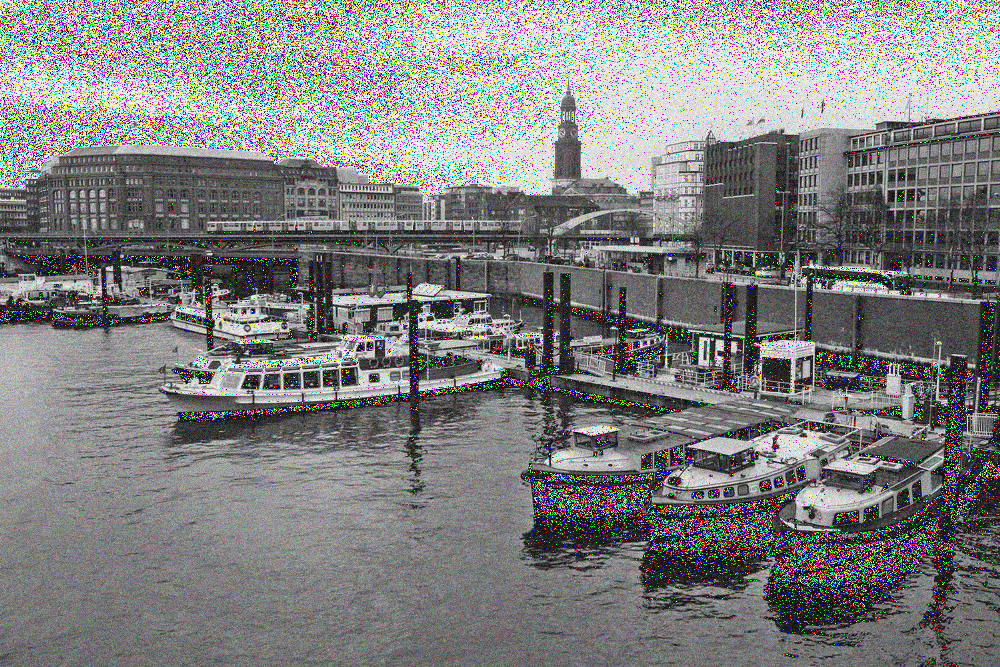

In [48]:
Image.fromarray(noisy.astype(np.uint8))

In [53]:
# Train PCA on the noisy data with projection preserve 50% of the variance
pca = PCA(n_components=1)
noisy_reshaped = noisy.reshape(noisy.shape[0],-1)

pca = PCA(0.5).fit(noisy_reshaped)
pca.n_components_

1

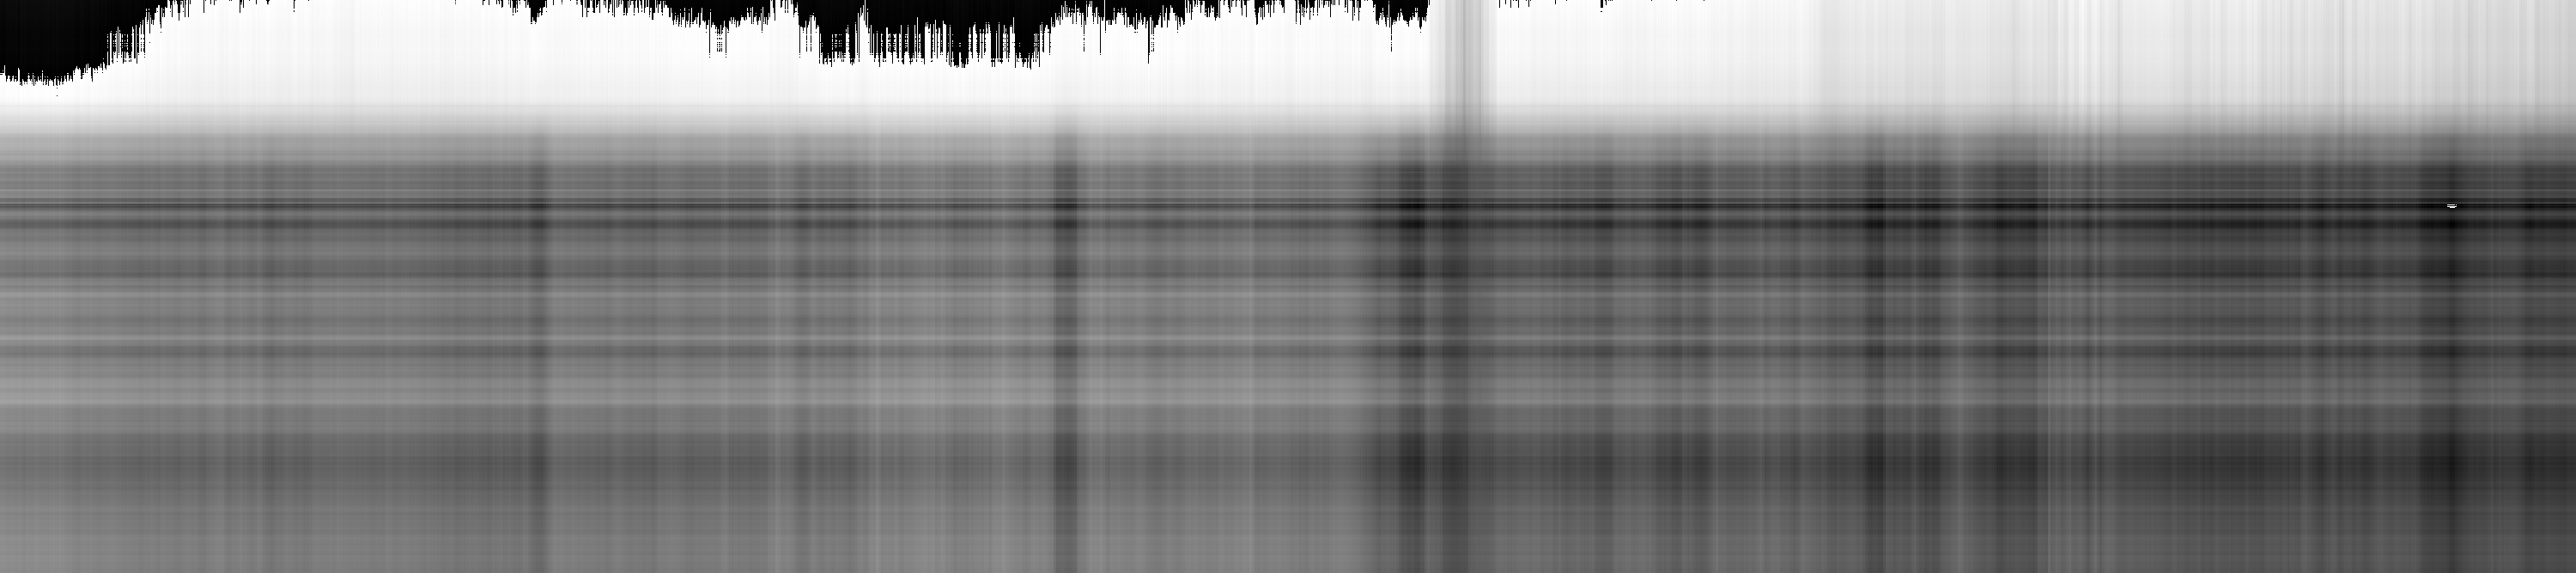

In [54]:
components = pca.fit_transform(noisy_reshaped)
filtered = pca.inverse_transform(components)
Image.fromarray(filtered.astype(np.uint8))

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - PCA bisa digunakan untuk berbagai fungsi, di antaranya adalah sebagai dimensionality reduction, noise filtering, dan denoise filtering.

In [55]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Rendy Wirawan Tamrin
NIM: 	00000053580
Time-stamp:	2023-03-02 09:25:09.159385


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [56]:
!jupyter nbconvert --to html "./IF540_Kelas EL_00000053580_Rendy Wirawan Tamrin_Week03.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_Kelas EL_00000053580_Rendy Wirawan Tamrin_Week03.ipynb to html
[NbConvertApp] Writing 10205682 bytes to IF540_Kelas EL_00000053580_Rendy Wirawan Tamrin_Week03.html
